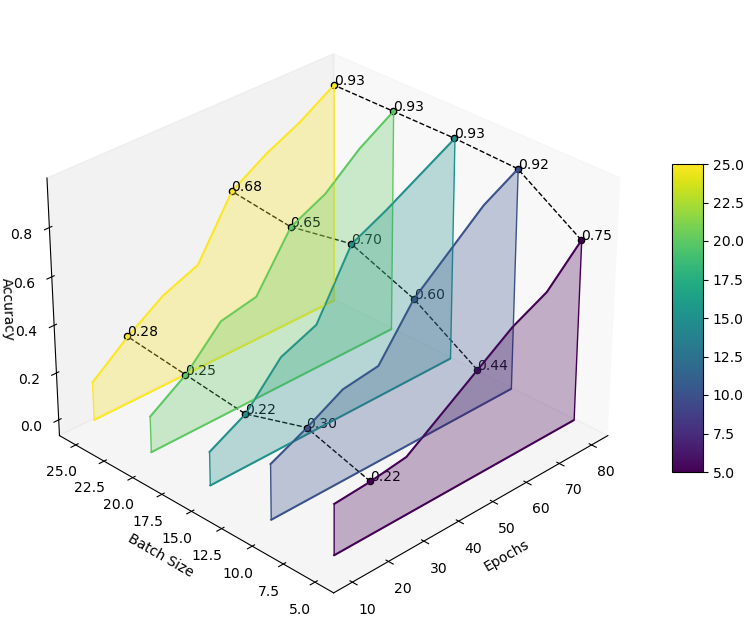

In [5]:
import matplotlib.pyplot as plt  # 导入matplotlib库用于绘制图形
from mpl_toolkits.mplot3d import Axes3D  # 导入3D绘图工具包
import numpy as np  # 导入numpy库用于数组和数值计算
import matplotlib.cm as cm  # 导入matplotlib的颜色映射模块
import matplotlib.colors as mcolors  # 导入颜色规范模块
from mpl_toolkits.mplot3d.art3d import Poly3DCollection  # 导入3D多边形集合，用于填充区域

# 数据定义
batch_sizes = [5, 10, 15, 20, 25]  # 不同的batch size
epochs = [10, 20, 30, 40, 50, 60, 70, 80]  # 不同的epoch
# 需要展示变化的Epoch
show_epochs = [20, 50, 80]  # 特定的epoch用于重点展示
accuracies = [  # 模拟不同batch size和epoch下的准确率
    [0.21, 0.22, 0.24, 0.34, 0.44, 0.54, 0.61, 0.75],
    [0.23, 0.30, 0.38, 0.40, 0.60, 0.72, 0.84, 0.92],
    [0.14, 0.22, 0.38, 0.44, 0.70, 0.77, 0.85, 0.93],
    [0.15, 0.25, 0.40, 0.43, 0.65, 0.72, 0.84, 0.93],
    [0.16, 0.28, 0.38, 0.44, 0.68, 0.77, 0.84, 0.93]
]

# 创建网格
X, Y = np.meshgrid(epochs, batch_sizes)  # 创建X-Y网格
Z = np.array(accuracies)  # 将准确率数据转化为numpy数组

# 绘制3D图形
fig = plt.figure(figsize=(10, 8))  # 创建一个10x8英寸的图形
ax = fig.add_subplot(111, projection='3d')  # 添加3D坐标轴

# 创建颜色映射
norm = mcolors.Normalize(vmin=min(batch_sizes), vmax=max(batch_sizes))  # 归一化batch size，用于颜色映射
cmap = cm.viridis  # 使用viridis颜色映射

# 设置统一的线宽
line_width = 1.0  # 统一的线宽设置

# 绘制每个batch size的折线
for i, batch_size in enumerate(batch_sizes):  # 循环遍历每个batch size
    # 绘制批次大小对应的3D曲线
    ax.plot(epochs, [batch_size]*len(epochs), accuracies[i], label=f'Batch Size {batch_size}', color=cmap(norm(batch_size)), linewidth=line_width)
    
    # 画出折线在平面上的投影
    ax.plot(epochs, [batch_size]*len(epochs), np.zeros(len(epochs)), color=cmap(norm(batch_size)), linewidth=line_width)
    
    # 创建用于填充的多边形顶点
    verts = [(x, batch_size, z) for x, z in zip(epochs, accuracies[i])]  # 曲线上的顶点坐标
    verts += [(x, batch_size, 0) for x in epochs[::-1]]  # XY平面上的顶点 (Z=0)
    
    # 使用 Poly3DCollection 填充曲线与 XY 平面之间的区域
    poly = Poly3DCollection([verts], color=cmap(norm(batch_size)), alpha=0.3)  # 创建半透明填充区域
    ax.add_collection3d(poly)  # 将填充区域添加到图形中

# 添加颜色条
mappable = cm.ScalarMappable(norm=norm, cmap=cmap)  # 创建颜色映射器
mappable.set_array(batch_sizes)  # 设置颜色映射的数据范围
fig.colorbar(mappable, ax=ax, shrink=0.5, aspect=10)  # 添加颜色条，调整大小和形状

# 在特定的epoch上展示点和数值
for epoch in show_epochs:  # 遍历需要重点展示的epoch
    data_list_x = []  # 存储epoch的数据
    data_list_y = []  # 存储batch size的数据
    data_list_z = []  # 存储准确率数据
    for i, batch_size in enumerate(batch_sizes):  # 遍历每个batch size
        # 绘制重点的散点图，突出显示
        ax.scatter(epoch, batch_size, accuracies[i][epochs.index(epoch)], color=cmap(norm(batch_size)), s=20, edgecolor='black', zorder=10)
        # 在散点旁边显示数值
        ax.text(epoch, batch_size, accuracies[i][epochs.index(epoch)], f'{accuracies[i][epochs.index(epoch)]:.2f}', color='black', zorder=10)
        data_list_x.append(epoch)  # 记录当前的epoch
        data_list_y.append(batch_size)  # 记录当前的batch size
        data_list_z.append(accuracies[i][epochs.index(epoch)])  # 记录当前的准确率
    # 绘制每个特定epoch下的虚线连接不同batch size的准确率
    ax.plot(data_list_x, data_list_y, data_list_z, color='black', linewidth=line_width, linestyle='--')

# 设置坐标轴标签
ax.set_xlabel('Epochs')  # 设置X轴标签
ax.set_ylabel('Batch Size')  # 设置Y轴标签
ax.set_zlabel('Accuracy', labelpad=-2)  # 设置Z轴标签

# 关闭默认的网格
ax.grid(False)  # 关闭网格线

# 调整视角
ax.view_init(elev=30, azim=225)  # 设置视角：俯视角30度，方位角225度

plt.savefig('3d_plot.png', dpi=300, bbox_inches='tight')  # 保存图形为高分辨率的PNG文件
# 显示图形
plt.show()  # 显示图形